# Students Admissions using Keras

## Studying the Data
The dataset has the following columns:
* Student GPA (grades)
* Score on the GRE (test)
* Class rank (1-4)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

admns_data = pd.read_csv('student_data.csv')

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


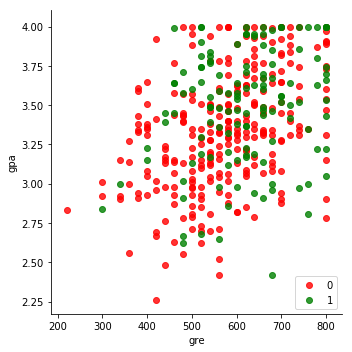

In [2]:
import seaborn as sns
sns.lmplot(x='gre', y='gpa', hue='admit', data=admns_data, legend=False, fit_reg=False, palette={1: 'green', 0:'red'})
plt.legend(loc='lower right')

In [3]:
rank_1 = admns_data[admns_data['rank']==1]
rank_2 = admns_data[admns_data['rank']==2]
rank_3 = admns_data[admns_data['rank']==3]
rank_4 = admns_data[admns_data['rank']==4]

In [4]:
def plot_rank(x_axis=None, y_axis=None, labels={}, data_per_rank=None, palette=None, hue_category=None, subplot=None):
    sns.lmplot(x=x_axis, y=y_axis, hue=hue_category, data=data_per_rank, legend=False, fit_reg=False, palette={1:'blue', 0:'red'})
    plt.legend(loc='lower right')
    plt.title(labels.get('title'))
    plt.xlabel(labels.get('xlabel'))
    plt.ylabel(labels.get('ylabel'))

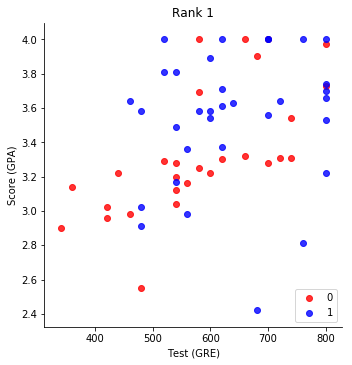

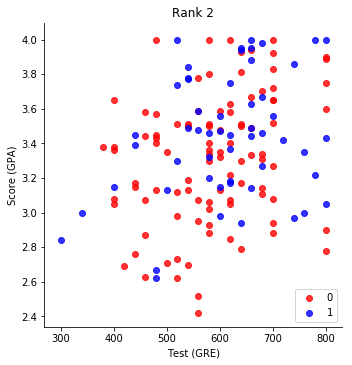

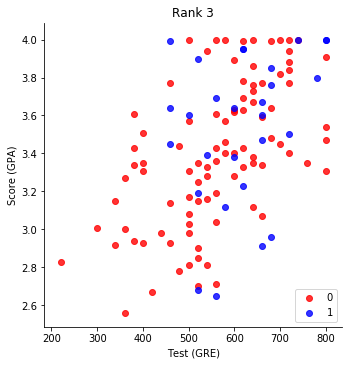

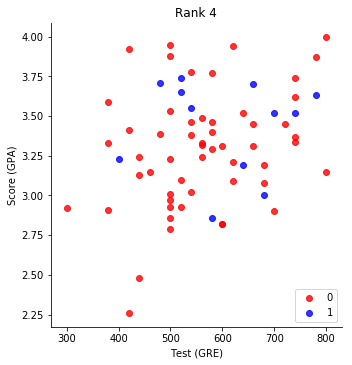

In [5]:
# Plotting Rank 1
plot_rank(x_axis='gre', 
          y_axis='gpa', 
          labels={'xlabel': 'Test (GRE)', 'ylabel': 'Score (GPA)', 'title': 'Rank 1'}, 
          data_per_rank=rank_1, 
          hue_category='admit')

# Plotting Rank 2
plot_rank(x_axis='gre', 
          y_axis='gpa', 
          labels={'xlabel': 'Test (GRE)', 'ylabel': 'Score (GPA)', 'title': 'Rank 2'}, 
          data_per_rank=rank_2, 
          hue_category='admit')

# Plotting Rank 3
plot_rank(x_axis='gre', 
          y_axis='gpa', 
          labels={'xlabel': 'Test (GRE)', 'ylabel': 'Score (GPA)', 'title': 'Rank 3'}, 
          data_per_rank=rank_3, 
          hue_category='admit')

# Plotting Rank 4
plot_rank(x_axis='gre', 
          y_axis='gpa', 
          labels={'xlabel': 'Test (GRE)', 'ylabel': 'Score (GPA)', 'title': 'Rank 4'}, 
          data_per_rank=rank_4, 
          hue_category='admit')

It seems like from the above graphs, the lower the rank the more the acceptance rate

## One-Hot Encoding the Rank
For this we will use `get_dummies` from the pandas

In [6]:
# Adding the one-hot encoded `rank` to admns_data
one_hot_data = pd.concat([admns_data, pd.get_dummies(admns_data['rank'], prefix='rank')], axis=1)

# Dropping the `rank` column from admns_data
one_hot_data = one_hot_data.drop('rank', axis=1)

display(one_hot_data[:10])

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


## Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereras the range for test scores is roughtly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [7]:
# Copying the data (Perform a deep copy)
processed_data = one_hot_data[:]

processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0

display(processed_data[:10])

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


## Splitting the data into `Training` and `Testing`

In order to test our algorithm, we'll split the data into a Training and a Testing Set. The size of the testing set will be 10% of the total data

In [8]:
from sklearn.model_selection import train_test_split
admit = one_hot_data[['admit']]
features = one_hot_data.drop('admit', axis=1)

features_train, features_test, admit_train, admit_test = train_test_split(features, admit, test_size=0.1, random_state=42)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
import numpy as np
import keras

features_train, features_test = np.array(features_train), np.array(features_test)
admit_train = np.array(keras.utils.to_categorical(admit_train, num_classes=2))
admit_test = np.array(keras.utils.to_categorical(admit_test, num_classes=2))

print(features_test[:10])
print(admit_train[:10])

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[[5.800e+02 8.750e-01 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [6.600e+02 9.850e-01 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [8.000e+02 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [7.400e+02 8.350e-01 0.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [5.800e+02 7.325e-01 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [5.000e+02 9.000e-01 0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [5.000e+02 7.325e-01 0.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [6.600e+02 8.600e-01 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [5.600e+02 8.100e-01 0.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [6.000e+02 8.850e-01 1.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


## Defining the model architecture using Keras

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
admit_model = Sequential()

# Hidden Layer 1
admit_model.add(Dense(128, input_dim=features.shape[1]))
admit_model.add(Activation('relu'))
admit_model.add(Dropout(0.2))

# Hidden Layer 2
admit_model.add(Dense(64))
admit_model.add(Activation('relu'))
admit_model.add(Dropout(0.2))

# Output Layer
admit_model.add(Dense(2))
admit_model.add(Activation('softmax'))

admit_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
admit_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 130       
__________

## Training the model

In [21]:
admit_model.fit(features_train, admit_train, epochs=200, batch_size=60, verbose=0)

In [22]:
train_score = admit_model.evaluate(features_train, admit_train)
print("\nTraining Accuracy: {}".format(train_score[1]))
test_score = admit_model.evaluate(features_test, admit_test)
print("\nTesting Accuracy: {}".format(test_score[1]))

360/360 [==============================] - 0s 445us/step

Training Accuracy: 0.6861111111111111
40/40 [==============================] - 0s 71us/step

Testing Accuracy: 0.65
